# AJUSTE DE CURVAS

## REGRECIÓN LINEAL 

In [27]:
import numpy as np
import PolyClass
from GaussianElimination import Resolver
import matplotlib.pyplot as plt
from SplineInterpolation import cspline


In [79]:
class polyfit(PolyClass.Poly):
    def __init__(self,x,y,grado=1):
        
        G = np.vander(x,grado+ 1, increasing=True)
        
        M = G.T @ G
        z = G.T @ y
        
        self.coef = Resolver(M,z)
        self.chi2= np.sum((G @ self.coef - y)**2)

In [59]:
x = np.linspace(-4,4,5)
y = np.random.randn(5)

f = polyfit(x,y)

In [60]:
f.coef

array([-1.28806462e-01,  8.81513041e-02, -4.49513357e-01,  5.81068545e-02,
        2.67134656e-02, -3.66210938e-03,  5.70458407e-05])

Text(0.5, 1.0, '$\\chi² =0000.000$')

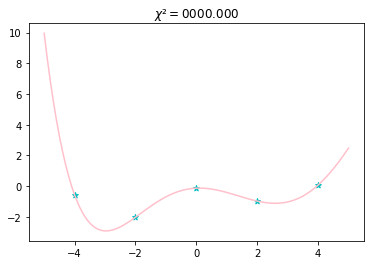

In [61]:
xx=np.linspace(-5,5,200)
plt.scatter(x,y, marker="*", color ="c")
plt.plot(xx,f(xx),color="pink")
plt.title(f"$\chi² ={f.chi2:08.3f}$")

In [62]:
f.chi2

4.5424983668317345e-29

# LAB

In [73]:
datos= np.genfromtxt('VOYAGER1_48S_MAG-VIM_251734.txt',skip_header=89)
xi = datos[:,1] #segundos 
yi = datos[:,2] #b

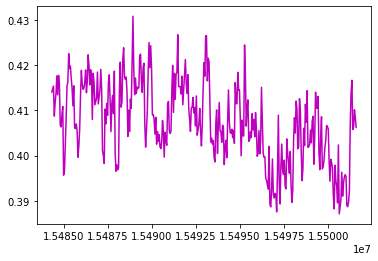

In [74]:
plt.plot(xi,yi , color="m")

In [71]:
g = cspline(xi,yi)

Text(0.5, 1.0, 'Interpolación con $ cspline$ ')

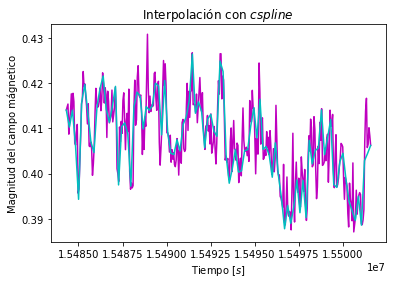

In [86]:
xx = np.linspace(xi.min(),xi.max()-1e-9,100)
plt.plot(xi,yi, color="m")
plt.plot(xx,g(xx), color ="c")
plt.xlabel("Tiempo $[s]$")
plt.ylabel("Magnitud del campo mágnetico")
plt.title("Interpolación con $ cspline $ ")

Text(0, 0.5, 'Magnitud del campo mágnetico')

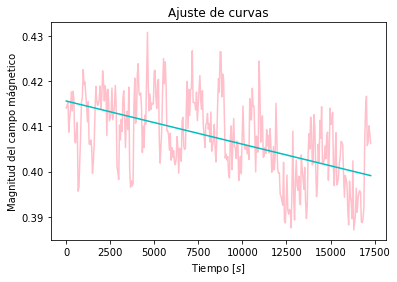

In [89]:
x = xi - xi[0]
f = polyfit(x,yi)
plt.plot(x,yi, color ="pink")
plt.plot(x,f(x),color="c")
plt.title(f"Ajuste de curvas")
plt.xlabel("Tiempo $[s]$")
plt.ylabel("Magnitud del campo mágnetico")